# Określam globalny seed na potrzeby odtworzenia wyników

In [1]:
seed = 42

# Przygotowuję zbiory danych

## Generuję zbiór X i Y

Każdy z elementów będzie się różnił od poprzedniego o 0.1. Następnie zbiór wymieszam, aby zapewnić losowość. Aby losowość była stała, podaję seed.

In [2]:
import random
import numpy as np # for init arry

x_set = np.array(np.arange(1, 30, 0.1).tolist(), dtype=float)
random.Random(seed).shuffle(x_set)

Zbiór Y miał być stały, więc tworzę tablicę z wymaganymi wartościami. Ją również wymieszam.

In [3]:
y_set = np.array([0.25, 0.5, 0.75, 1], dtype=float)
random.Random(seed).shuffle(y_set)

Podglądam zawartośc wygenerowanych i wymieszanych zbiorów

In [4]:
print(x_set)
print(y_set)

[29.1  7.1 20.6 27.2 21.4 24.7  9.5  9.6 27.9 14.8 15.8  4.8 13.9  1.1
 13.1 10.5 23.2  6.   1.5 26.9 20.9 20.3 10.1  3.4 26.3  7.5 15.6  4.7
 22.  14.3 21.3  9.2 18.8 14.4 27.7 13.4 23.3 29.6  3.2 24.8 28.   1.6
 26.2  3.6 24.2  8.8 17.1  5.8 21.9 16.  17.8  4.4 28.3 23.5  5.2 24.
 21.   4.2  1.4  9.9  6.5 22.1 12.3 26.  19.8 16.6  1.9 29.5  8.3 20.2
 27.1 21.1 25.3 29.7 25.5 28.8 29.9  7.6 16.9 13.   6.1 11.5 13.2 27.
 16.7 18.7 13.3 12.5  4.3  3.1  8.   7.   9.4 24.9 21.2 14.9 19.5 21.7
 28.1 11.   2.   8.2 11.4  1.7  4.  16.2 11.3 11.6  5.6 19.7 20.1 20.8
 25.4 19.9 14.2 14.1 10.9 26.7 23.4 24.3 28.4  2.9 24.5  8.7 15.4 27.6
 11.7  8.6  3.7  5.5 13.8 21.5  1.  22.7 16.1 28.6 25.  16.3  9.7 19.2
 17.6  3.9  1.2 25.1  7.4 14.5 28.5 20.5 10.8 19.1 11.8  5.   4.9  3.8
 29.8  3.3 13.6 14.  23.8 20.  24.4 26.5 18.3 11.9 15.9 18.  25.6 15.3
  7.3  4.5 26.1  4.6 25.7 17.4 28.2 13.7 17.7 24.1 19.4 15.5  6.4 29.2
 21.8 11.2  9.   1.8 23.7  2.4  9.3 18.5  6.6 27.3 18.6 17.3  7.9 22.9
 12.8 22

## Definiuję funkcję A i B wymaganą treścią zadania

Importuję wpierw wymagane biblioteki do liczenia ln i sin, następnie definiuję funkcje, ktore mają odzwierciedlać funckje dwóch zmiennych wymagane treścią zadania

In [5]:
from numpy import log as ln # for ln
import math # sin

def function_a(x, y):
    return y * ln(x)

def function_b(x, y):
    return 2 * y * math.sin((x-1)/20)

Testuję pierwszą funkcję i porównuję z wykresem z treści zadania

In [6]:
function_a(5, 0.5)

0.8047189562170501

Testuję drugą funkcję i porównuję z wykresem z treści zadania

In [7]:
function_b(5, 0.5)

0.19866933079506122

## Tworzę `DataFrame`'y, na podstawie których będę wyuczał algorytmy

Użyję objektu `DataFrame` z biblioteki `pandas`. jest on wspierany przez większość algorytmów, a zintegrowane wygodne operacje na zbiorze ułatwią mi pracę. Tworzę więc dwa `DataFrame`:
- `df_a` zawiera wszystkie kombinacje wartości x i y z wygenerowanych zbiorów i wynik funkcji A dla nich
- `df_b` zawiera wszystkie kombinacje wartości x i y z wygenerowanych zbiorów i wynik funkcji B dla nich

In [8]:
from pandas import DataFrame # for dataframes

list_a = []

for x in list(x_set):
  for y in list(y_set):
    data = {}
    data['x'] = x
    data['y'] = y
    data['result'] = function_a(x,y)
    list_a.append(data)
    
df_a = DataFrame(list_a)
    
list_b = []

for x in list(x_set):
  for y in list(y_set):
    data = {}
    data['x'] = x
    data['y'] = y
    data['result'] = function_b(x,y)
    list_b.append(data)

df_b = DataFrame(list_b)

Podglądam zawartość pierwszego `DataFrame`'a

In [9]:
df_a.head(5)

,x,y,result
0,29.1,0.75,2.528054
1,29.1,0.50,1.685369
2,29.1,1.00,3.370738
3,29.1,0.25,0.842685
4,7.1,0.75,1.470071


Podglądam zawartość drugiego `DataFrame`'a

In [10]:
df_b.head(5)

,x,y,result
0,29.1,0.75,1.479431
1,29.1,0.50,0.986287
2,29.1,1.00,1.972574
3,29.1,0.25,0.493144
4,7.1,0.75,0.450440


# Dzielę zbiory na uczący i testujący

Importuje bibliotekę dzielącą zbiory `train_test_split` z pakietu `sklearn` oraz określam stałe, aby przejrzyście wywołać algorytmy

In [11]:
from sklearn.model_selection import train_test_split

feature_col_names = ['x', 'y']
predicted_class_names = ['result']
split_test_size = 0.30

### Funkcja A

Dzielę zbiór danych funkcji A oraz sprawdzam proporcje podziału

In [12]:
x_a = df_a[feature_col_names].values     # predictor feature columns
y_a = df_a[predicted_class_names].values # predicted value

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=split_test_size, random_state=seed) 

print("{0:0.2f}% in training set of a".format((len(x_a_train)/len(df_a.index)) * 100))
print("{0:0.2f}% in test set of a".format((len(x_a_test)/len(df_a.index)) * 100))

70.00% in training set of a
30.00% in test set of a


Podglądam wielkość przygotowanego zbioru uczącego algorytm funkcji A

In [13]:
x_a_train.shape

(812, 2)

### Funkcja B

Dzielę zbiór danych funkcji B oraz sprawdzam proporcje podziału

In [14]:
x_b = df_b[feature_col_names].values     # predictor feature columns
y_b = df_b[predicted_class_names].values # predicted value

x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=split_test_size, random_state=seed)

print("{0:0.2f}% in training set of b".format((len(x_b_train)/len(df_b.index)) * 100))
print("{0:0.2f}% in test set of b".format((len(x_b_test)/len(df_b.index)) * 100))

70.00% in training set of b
30.00% in test set of b


Podglądam wielkość przygotowanego zbioru uczącego algorytm funkcji B

In [15]:
x_b_train.shape

(812, 2)

# Budowa modelu, wyuczenie algorytmu i test wyników dla funkcji A

Metodą prób i błędów stroję algorytm aż uzyskam satysfakcjonujący wynik. Poprawność danych weryfikuję w następnych funkcjach.

Ustawiam stałe do obliczeń (będą potem potrzebne do testowania wyników)

In [16]:
epochs=300
batch_size=40

Do uzyskania satysfakcjonującego wyniku użyłem 3 warstw.
1. Warstwa wejściowa składająca się składająca się z dwóch wartości (bo 2 zmienne) oraz z 4 neuronów, co oznacza, że warstwa musi nauczyć się aż 4 zmiennych wewnętrzanych
2. Warstwa ukryta składająca się z 4 neuronów
3. Warstwa wyjściowa, składająca się z jednego neuronu

In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import time

start = time.time()

model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(4))
model.add(Dense(1))

Optymalizator (funkcja optymalizacyjna) polega na takim dopasowaniu zmiennych wewnętrznych, aby jak najbardziej zmniejszyć wartość funkcji straty. Współczynnik uczenia informuje algorytm, jak agresywnie powinien starać się znaleźć najlepszy model.

Wykorzystuję optymalizator `Adam`. Wykorzystuję również funkcję straty `mean_squared_error`. Funkcja straty określa, jak daleko przewidziana wartość znajduje się od pożądanej wartości. Wykorzystana przeze mnie funkcja jest średnią błędu kwadratowego wyrażanej jako suma kwadratu różnicy między przewidywanymi i rzeczywistymi zmiennymi docelowymi dla wszystkich punktów danych, podzielona przez liczbę tych punktów, (wzór poniżej).

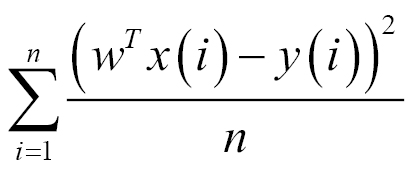

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Teraz należy wytrenować model przy użyciu metody fit. Metoda przyjmuje parametr epochs, który określa ilość pełnych przejść przez pełen zbiór - np. dla wartości 300 nasz model zostanie wytrenowany 300 * 812 = 243600 przykładami. Poniżej zobaczymy również, ile zajęło pełne wykonanie algorytmu, od momentu określania warstw uczących.

In [19]:
history = model.fit(x_a_train, y_a_train, epochs=epochs, batch_size=batch_size, validation_data=(x_a_test, y_a_test), verbose=False)

end = time.time()
print("Time elapsed " + str(end - start) + " s")

Time elapsed 14.028898477554321 s


Poniższy wykres wyraźnie prezentuje, że wartość loss zatrzymała się dla pewnej wartości. Wynika z tego, że można nadal zmniejszyć wartość `epochs`, aby przyspieszyć obliczenia. Pozostawiam ją, aby zaprezentować ten fakt.

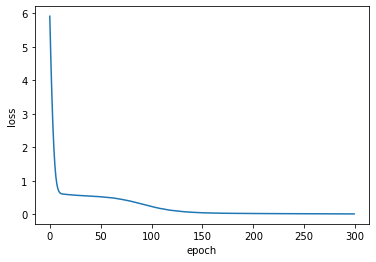

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

Poniżej testy dla podzielonych zbiorów

In [21]:
score_a, acc_a = model.evaluate(x_a_train, y_a_train, batch_size=batch_size)
print("score_a " + str(score_a))
print("acc_a " + str(acc_a))

21/21 [==============================] - 0s 450us/step - loss: 0.0094 - accuracy: 0.0012
score_a 0.009381902404129505
acc_a 0.001231527072377503


In [22]:
score_a, acc_a = model.evaluate(x_a_test, y_a_test, batch_size=batch_size)
print("score_a " + str(score_a))
print("acc_a " + str(acc_a))

9/9 [==============================] - 0s 625us/step - loss: 0.0087 - accuracy: 0.0057
score_a 0.008744202554225922
acc_a 0.005747126415371895


Poniżej test praktyczny, dla ręcznie wybranej wartości

In [23]:
print("Oczekiwany:" + str(function_a(7, 0.5)))
print("Uzyskany:" + str(model.predict([[7, 0.5]])))
print("---")

print("Oczekiwany:" + str(function_a(5, 0.75)))
print("Uzyskany:" + str(model.predict([[5, 0.75]])))
print("---")

print("Oczekiwany:" + str(function_a(1, 0.25)))
print("Uzyskany:" + str(model.predict([[1, 0.25]])))
print("---")

print("Oczekiwany:" + str(function_a(15, 0.5)))
print("Uzyskany:" + str(model.predict([[15, 0.5]])))

Oczekiwany:0.9729550745276566
Uzyskany:[[1.0009947]]
---
Oczekiwany:1.2070784343255752
Uzyskany:[[1.1878769]]
---
Oczekiwany:0.0
Uzyskany:[[-0.15734072]]
---
Oczekiwany:1.354025100551105
Uzyskany:[[1.3269417]]


Podglądam wagi modelu w poszczególnych warstwach

In [24]:
model.get_layer(index=0).get_weights()

[array([[ 0.47962332,  1.3776684 ,  0.04318305, -0.00406593],
        [-3.0280442 ,  2.1281896 ,  1.4182845 ,  1.9929489 ]],
       dtype=float32),
 array([ 0.60666823,  0.82979214, -2.3243718 , -1.224366  ], dtype=float32)]

In [25]:
model.get_layer(index=1).get_weights()

[array([[ 7.4205345e-01,  2.7380319e-04, -1.4056098e-01,  1.3344798e+00],
        [ 6.3598585e-01, -3.4251103e-01, -4.8389766e-01, -9.4808465e-01],
        [ 2.4560784e-01,  7.6040041e-01,  1.0298077e+00,  6.3254184e-01],
        [-3.6640540e-01,  8.9791638e-01,  5.6347065e-02,  1.4620075e+00]],
       dtype=float32),
 array([-0.10144454, -0.10424718, -0.06525999, -0.15339875], dtype=float32)]

In [26]:
model.get_layer(index=2).get_weights()

[array([[0.05339684],
        [1.705311  ],
        [1.1471629 ],
        [1.4401865 ]], dtype=float32),
 array([-0.0345834], dtype=float32)]

Poniżej przygotowuje zbiory wartości wyznaczonych przez algorytm dla funkcji b do zaprezentowania na wykresie

In [27]:
x_set = np.linspace(1,30,100)

y_025_set = []
for x_item in x_set:
    y_025_set.append(model.predict([[x_item, 0.25]])[0][0])
    
y_05_set = []
for x_item in x_set:
    y_05_set.append(model.predict([[x_item, 0.5]])[0][0])
    
y_75_set = []
for x_item in x_set:
    y_75_set.append(model.predict([[x_item, 0.75]])[0][0])
    
y_1_set = []
for x_item in x_set:
    y_1_set.append(model.predict([[x_item, 1]])[0][0])

Rysuję wykres

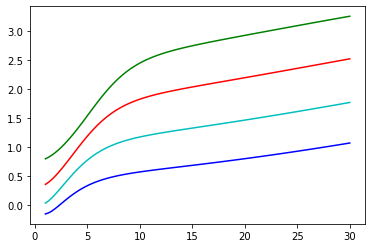

In [28]:
%matplotlib inline

plt.figure()

plt.plot(x_set,y_025_set, 'b', label='0.25')
plt.plot(x_set,y_05_set, 'c', label='0.5')
plt.plot(x_set,y_75_set, 'r', label='0.75')
plt.plot(x_set,y_1_set, 'g', label='1')

plt.show()

Dla porównania dodaję wykres z zadania

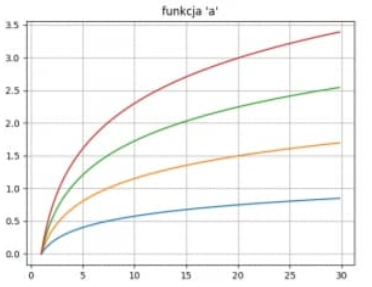

# Budowa modelu, wyuczenie algorytmu i test wyników dla funkcji B

Również tutaj, metodą prób i błędów stroję algorytm aż uzyskam satysfakcjonujący wynik. Poprawność danych weryfikuję w następnych funkcjach.

Ustawiam stałe do obliczeń (będą potem potrzebne do testowania wyników)

In [29]:
epochs=500
batch_size=150

Do uzyskania satysfakcjonującego wyniku użyłem 4 warstw.

1. Warstwa wejściowa składająca się składająca się z dwóch wartości (bo 2 zmienne) oraz z 5 neuronów, co oznacza, że warstwa musi nauczyć się aż 4 zmiennych wewnętrzanych
2. Warstwa ukryta składająca się z 7 neuronów
3. Warstwa ukryta składająca się z 3 neuronów
4. Warstwa wyjściowa, składająca się z jednego neuronu

In [30]:
start = time.time()

model = Sequential()
model.add(Dense(5, input_dim=2, activation='sigmoid'))
model.add(Dense(7))
model.add(Dense(3))
model.add(Dense(1))

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(x_b_train, y_b_train, epochs=epochs, batch_size=batch_size, validation_data=(x_b_test, y_b_test), verbose=False)

end = time.time()
print("Time elapsed " + str(end - start) + " s")

Time elapsed 17.690579175949097 s


Poniższy wykres wyraźnie prezentuje, że wartość loss zatrzymała się dla pewnej wartości. Wynika z tego, że można nadal zmniejszyć wartość `epochs`, aby przyspieszyć obliczenia. Pozostawiam ją, aby zaprezentować ten fakt.

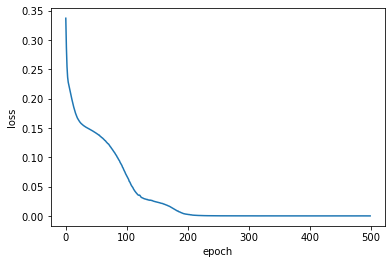

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

Poniżej testy dla podzielonych zbiorów

In [34]:
score_b, acc_b = model.evaluate(x_b_train, y_b_train, batch_size=batch_size)
print("score_b " + str(score_b))
print("acc_b " + str(acc_b))

6/6 [==============================] - 0s 800us/step - loss: 1.8111e-04 - accuracy: 0.0025
score_b 0.00018110968812834471
acc_b 0.002463054144755006


In [35]:
score_b, acc_b = model.evaluate(x_b_test, y_b_test, batch_size=batch_size)
print("score_b " + str(score_b))
print("acc_b " + str(acc_b))

3/3 [==============================] - 0s 2ms/step - loss: 1.9658e-04 - accuracy: 0.0057
score_b 0.00019657601660583168
acc_b 0.005747126415371895


Poniżej test praktyczny, dla ręcznie wybranej wartości

In [36]:
print("Oczekiwany:" + str(function_b(7, 0.5)))
print("Uzyskany:" + str(model.predict([[7, 0.5]])))
print("---")

print("Oczekiwany:" + str(function_b(5, 0.75)))
print("Uzyskany:" + str(model.predict([[5, 0.75]])))
print("---")

print("Oczekiwany:" + str(function_b(1, 0.25)))
print("Uzyskany:" + str(model.predict([[1, 0.25]])))
print("---")

print("Oczekiwany:" + str(function_b(15, 0.5)))
print("Uzyskany:" + str(model.predict([[15, 0.5]])))

Oczekiwany:0.29552020666133955
Uzyskany:[[0.28237945]]
---
Oczekiwany:0.2980039961925918
Uzyskany:[[0.28920317]]
---
Oczekiwany:0.0
Uzyskany:[[-0.05868895]]
---
Oczekiwany:0.644217687237691
Uzyskany:[[0.6428117]]


Podglądam wagi modelu w poszczególnych warstwach

In [37]:
model.get_layer(index=0).get_weights()

[array([[-0.15119687,  0.02618906, -0.13483632,  0.6568982 ,  0.00622457],
        [ 0.67099005,  0.43196046, -1.3557036 ,  0.00388332, -1.2114512 ]],
       dtype=float32),
 array([ 0.24980639, -0.33752093,  0.32047158, -0.02985956,  0.39910522],
       dtype=float32)]

In [38]:
model.get_layer(index=1).get_weights()

[array([[ 0.52930987,  0.3135573 , -0.27938718, -0.29057935,  0.31849405,
         -0.9908298 ,  0.38217738],
        [-0.42630944,  0.6755883 ,  0.525743  , -0.40144464, -0.5480527 ,
          0.4757703 , -0.25752735],
        [-1.0364081 , -0.25094992,  0.46451712,  0.07329693, -0.1181206 ,
          0.28000382, -0.6535568 ],
        [ 0.4120957 ,  0.15386456, -0.1042478 , -0.6300692 ,  0.32294837,
         -0.0101073 , -0.7215303 ],
        [ 0.561467  , -0.7769164 , -0.94858813, -0.01652082, -0.59722805,
         -0.56141084,  0.5805916 ]], dtype=float32),
 array([-0.09165321,  0.00390107,  0.09165014, -0.05042836,  0.06949554,
         0.09185643, -0.07604894], dtype=float32)]

In [39]:
model.get_layer(index=2).get_weights()

[array([[-0.13528982, -0.681736  , -1.125874  ],
        [ 0.15300016, -0.3558515 ,  1.1117113 ],
        [ 1.2384336 ,  0.9685108 ,  0.17200896],
        [-0.73514026, -0.09340946,  0.50203806],
        [-0.5013748 ,  0.41193402, -0.00476136],
        [ 0.8055216 ,  0.34158996,  0.68336123],
        [-0.49086207, -0.79749197, -0.52963597]], dtype=float32),
 array([0.06346697, 0.0679156 , 0.08793966], dtype=float32)]

In [40]:
model.get_layer(index=3).get_weights()

[array([[0.6645371 ],
        [1.3563148 ],
        [0.85700047]], dtype=float32),
 array([0.05816024], dtype=float32)]

Poniżej przygotowuje zbiory wartości wyznaczonych przez algorytm dla funkcji b do zaprezentowania na wykresie

In [41]:
x_set = np.linspace(1,30,100)

y_025_set = []
for x_item in x_set:
    y_025_set.append(model.predict([[x_item, 0.25]])[0][0])
    
y_05_set = []
for x_item in x_set:
    y_05_set.append(model.predict([[x_item, 0.5]])[0][0])
    
y_75_set = []
for x_item in x_set:
    y_75_set.append(model.predict([[x_item, 0.75]])[0][0])
    
y_1_set = []
for x_item in x_set:
    y_1_set.append(model.predict([[x_item, 1]])[0][0])

Rysuję wykres

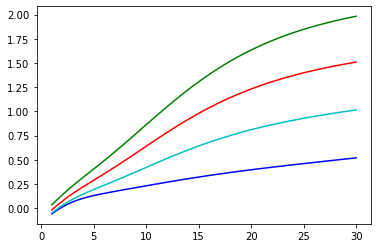

In [42]:
%matplotlib inline

plt.figure()

plt.plot(x_set,y_025_set, 'b', label='0.25')
plt.plot(x_set,y_05_set, 'c', label='0.5')
plt.plot(x_set,y_75_set, 'r', label='0.75')
plt.plot(x_set,y_1_set, 'g', label='1')

plt.show()

Dla porównania dodaję wykres z zadania

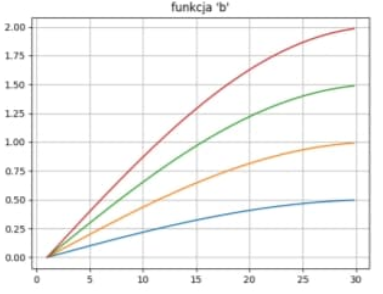